In [1]:
#导入泰坦尼克号数据集
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Narrativedata.csv')
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [3]:
data.shape

(891, 4)

In [4]:
#查看整体信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


In [7]:
data.isnull().sum() #查看每一个特征的缺失值情况

Age         177
Sex           0
Embarked      2
Survived      0
dtype: int64

In [8]:
#计算缺失值比例
data.isnull().sum()/data.shape[0]

Age         0.198653
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [9]:
#查看缺失值比例简便方法
data.isnull().mean()

Age         0.198653
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [15]:
#填补年龄特征的缺失值
Age = data.loc[:,'Age'].values.reshape(-1,1)
Age[:6]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan]])

In [18]:
from sklearn.impute import SimpleImputer #导入填写缺失值的包

imp_mean = SimpleImputer()                                #默认均值填补
imp_median = SimpleImputer(strategy='median')             #中位数填补
imp_0 = SimpleImputer(strategy='constant',fill_value = 0) #用0填补

In [19]:
#训练模型
imp_mean = imp_mean.fit_transform(Age)  
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)

In [21]:
imp_mean[:6]

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765]])

In [23]:
imp_median[:6]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.]])

In [24]:
imp_0[:6]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [ 0.]])

In [26]:
#把训练好的数据放回原数据集中
#这里我们用中位数对年龄进行填补
data.loc[:,'Age'] = imp_median

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


In [48]:
Embarked[:6]

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q']], dtype=object)

In [30]:
#用众数对Embarked进行填充
Embarked = data.loc[:,'Embarked'].values.reshape(-1,1)
Embarked[:6]

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q']], dtype=object)

In [33]:
#实例化
imp_mode = SimpleImputer(strategy='most_frequent')
imp_mode = imp_mode.fit_transform(Embarked)  #训练并查看最后结果
imp_mode[:6]

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q']], dtype=object)

In [34]:
#把训练好的数据放回原数据集中
data.loc[:,'Embarked'] = imp_mode

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         891 non-null float64
Sex         891 non-null object
Embarked    891 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


### 标签专用编码

In [37]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [41]:
#导入编码的包
from sklearn.preprocessing import LabelEncoder #标签专用

In [44]:
y = data.iloc[:,-1] #原数据集中的标签
y

0           No
1          Yes
2          Yes
3          Yes
4           No
5           No
6           No
7           No
8          Yes
9          Yes
10     Unknown
11         Yes
12          No
13          No
14          No
15     Unknown
16          No
17         Yes
18          No
19         Yes
20     Unknown
21         Yes
22         Yes
23         Yes
24          No
25     Unknown
26          No
27          No
28         Yes
29          No
        ...   
861         No
862        Yes
863         No
864    Unknown
865    Unknown
866    Unknown
867         No
868         No
869        Yes
870         No
871    Unknown
872         No
873         No
874        Yes
875        Yes
876         No
877         No
878         No
879        Yes
880        Yes
881         No
882         No
883    Unknown
884         No
885         No
886         No
887        Yes
888         No
889    Unknown
890         No
Name: Survived, Length: 891, dtype: object

In [45]:
le = LabelEncoder()      #实例化
le = le.fit(y)           #训练模型,标签专用编码包允许输入一维数据
label = le.transform(y)  #导出训练后结果
label[:5] 

array([0, 2, 2, 2, 0])

In [46]:
#重要属性
le.classes_

array(['No', 'Unknown', 'Yes'], dtype=object)

In [49]:
#查看sklearn版本
import sklearn
sklearn.__version__

'0.20.3'

In [64]:
data.iloc[:,-1] = label #把编码好的标签放回原数据集中

### 特征专用编码

In [65]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [66]:
from sklearn.preprocessing import OrdinalEncoder #特征专用的包

In [67]:
#提取出所有的分类特征
data_ = data.copy()  #建立一个原数据集的副本，后续操作就在副本上进行更改
X = data_.iloc[:,1:-1]
X.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [68]:
# data_.loc[:,['Sex','Embarked']]

In [69]:
oe = OrdinalEncoder()  #实例化
oe = oe.fit(X)         #训练模型
re = oe.transform(X)   #输出转换后的结果

In [70]:
re  

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

In [71]:
#把输出后的结果放回data_
data_.iloc[:,1:-1] = re

In [73]:
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


### 梳理：数据处理及编码过程

In [89]:
#导入原本数据集
import numpy as np
import pandas as pd

df = pd.read_csv('Narrativedata.csv') #导入数据集
df.head() #查看数据集

#查看数据整体信息
df.info()

#查看缺失值的比例
df.isnull().mean()

#处理有缺失值的特征
from sklearn.impute import SimpleImputer

#用中位数填充年龄特征
df.loc[:,'Age'] = SimpleImputer(strategy='median').fit_transform(df.loc[:,'Age'].values.reshape(-1,1))
#用众数填充Embarked特征
df.loc[:,'Embarked'] = SimpleImputer(strategy='most_frequent').fit_transform(df.loc[:,'Embarked'].values.reshape(-1,1))

#编码
#先对标签进行编码
from sklearn.preprocessing import LabelEncoder
df.iloc[:,-1] = LabelEncoder().fit_transform(df.iloc[:,-1]) #标签编码，这里允许一维数据输入

#对分类特征进行编码
from sklearn.preprocessing import OrdinalEncoder
df.iloc[:,1:-1] = OrdinalEncoder().fit_transform(df.iloc[:,1:-1])

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age         714 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Survived    891 non-null object
dtypes: float64(1), object(3)
memory usage: 27.9+ KB


,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [90]:
from sklearn.preprocessing import OneHotEncoder #导入独热编码包

In [91]:
X = data.iloc[:,1:-1] #提取出所有的名义变量
result = OneHotEncoder(categories='auto').fit_transform(X).toarray() #进行独热编码

In [92]:
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [95]:
pd.DataFrame(result)

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
5,0.0,1.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,1.0
9,1.0,0.0,1.0,0.0,0.0


In [100]:
pd.concat([data,pd.DataFrame(result)],axis=1)

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0
5,28.0,male,Q,0,0.0,1.0,0.0,1.0,0.0
6,54.0,male,S,0,0.0,1.0,0.0,0.0,1.0
7,2.0,male,S,0,0.0,1.0,0.0,0.0,1.0
8,27.0,female,S,2,1.0,0.0,0.0,0.0,1.0
9,14.0,female,C,2,1.0,0.0,1.0,0.0,0.0


In [101]:
newdata = pd.concat([data,pd.DataFrame(result)],axis=1) #合并原数据和编码后的结果
newdata.drop(["Sex","Embarked"],axis=1,inplace=True) #删除原名义变量

In [104]:
newdata.head()

,Age,Survived,0,1,2,3,4
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [105]:
newdata.columns =["Age","Survived","Female","Male","Embarked_C","Embarked_Q","Embarked_S"] #重命名列名
newdata.head()

,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [109]:
X.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [107]:
#细节
enc = OneHotEncoder(categories='auto').fit(X)
re = enc.transform(X).toarray()

enc.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

### 连续型特征的二值化

In [111]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [117]:
data['Age'].min()

0.42

In [118]:
data['Age'].max()

80.0

In [119]:
#将年龄二值化
data_2 = data.copy()
from sklearn.preprocessing import Binarizer #导入二值化的包

In [120]:
#提取目标数据
X = data_2.iloc[:,0].values.reshape(-1,1) #类为特征专用，所以不能使用一维数组

In [122]:
transformer = Binarizer(threshold=30).fit_transform(X)
transformer

In [123]:
from sklearn.preprocessing import KBinsDiscretizer #导入连续特征分段函数

In [156]:
#提取目标特征
X = data.iloc[:,0].values.reshape(-1,1)

In [157]:
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform') #实例化

In [158]:
est.fit_transform(X) #训练模型并导出最后结果

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [159]:
#查看转换后分的箱：变成了一列中的三箱
set(est.fit_transform(X).ravel())

{0.0, 1.0, 2.0}

In [160]:
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform') #实例化

In [161]:
#查看转换后分的箱：变成了哑变量
est.fit_transform(X).toarray().sum(0)

array([319., 522.,  50.])

In [165]:
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='quantile')
#查看转换后分的箱：变成了哑变量,且每个类别数量基本相等
est.fit_transform(X).toarray().sum(0)

array([278., 310., 303.])

In [167]:
est = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile')
#查看转换后分的箱：变成了哑变量,且每个类别数量基本相等
est.fit_transform(X).sum(0)

array([278., 310., 303.])

## 特征选择

In [140]:
#导入数据
import pandas as pd
df = pd.read_csv('digit recognizor.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df.shape

(42000, 785)

In [142]:
X = df.iloc[:,1:]  #特征
y = df.iloc[:,0]   #标签

In [143]:
X.shape

(42000, 784)

### filter过滤法   
- 方差过滤

In [145]:
from sklearn.feature_selection import VarianceThreshold  #导入方差过滤包

In [146]:
selector = VarianceThreshold() #实例化，不填参数默认方差为0

In [147]:
X_var0 = selector.fit_transform(X) #获取删除不合格特征之后的新特征矩阵

In [149]:
X_var0.shape

(42000, 708)

In [150]:
#也可以直接写成 X = VairanceThreshold().fit_transform(X)

In [152]:
np.median(X.var().values)

1352.286703180131

In [153]:
import numpy as np

In [154]:
%%timeit
X_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)
X_fsvar.shape

632 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


- 相关性过滤

In [168]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest #选择前k个最优特征
from sklearn.feature_selection import chi2        #卡方检验

In [170]:
X_fsvar.shape

(42000, 392)

In [171]:
#假设在这里，已知需要300个特征
X_fschi = SelectKBest(chi2, k=300).fit_transform(X_fsvar, y)
X_fschi.shape

(42000, 300)

In [173]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9333098667649198

In [174]:
%matplotlib inline
import matplotlib.pyplot as plt

In [175]:
score = []
for i in range(390,200,-10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(X_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)

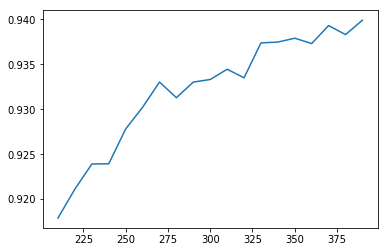

In [177]:
plt.plot(range(390,200,-10),score)
plt.show()

In [178]:
chi2val, pval = chi2(X_fsvar,y)

In [179]:
chi2val

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  191589.23696468,  902883.1255264 ,
       1237265.16042373, 1503477.73699155, 1625807.41495542,
       1630206.90922916, 1630597.02883804, 1633456.72909664,
       1610816.75571229, 1483382.49543886, 1256290.1574794 ,
        951236.1617682 ,  693192.66191748,  532386.96220361,
        504617.38933715,  575090.36046243,  501025.03733245,
        802341.10683194, 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,

In [180]:
pval

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [181]:
#在卡方检验结果中，卡方值越大，P值越小，原假设H0的拒绝程度越大，也就是特征与标签无关的概率越低
#k取多少？我们想要消除所有p值大于设定值，比如0.05或0.01的特征：
k = chi2val.shape[0] - (pval > 0.05).sum()

In [182]:
k

392

In [184]:
k = (pval<=0.05).sum() 
k

392

In [185]:
X_fschi = SelectKBest(chi2, k=392).fit_transform(X_fsvar, y)
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9388098166696807

In [186]:
from sklearn.feature_selection import f_classif

In [188]:
f_val,p_val = f_classif(X_fsvar,y)

In [189]:
f_val

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [192]:
sum(p_val<=0.05)

392

- 互信息法

In [193]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(X_fsvar,y)

In [195]:
min(result)

0.018801579519951872

In [196]:
sum(result <=0) #可以删掉的特征数

0

In [197]:
k = result.shape[0] - sum(result <= 0)

In [198]:
k

392

### 嵌入法

In [201]:
X.shape

(891, 1)

In [202]:
df.shape

(42000, 785)

In [204]:
X.shape

(42000, 784)

In [199]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [203]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [205]:
RFC_ = RFC(n_estimators =10,random_state=0)
X_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(X,y)

In [207]:
X_embedded.shape

(42000, 47)

In [209]:
import numpy as np
import matplotlib.pyplot as plt

In [208]:
RFC_.fit(X,y).feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.96726660e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.39623410e-06,
       7.35101726e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.70425050e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.09114204e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [210]:
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(),20)

In [211]:
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score.append(once)

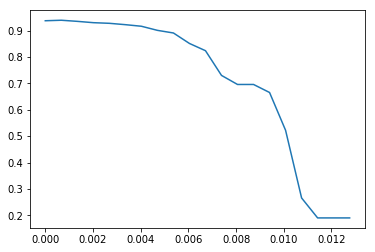

In [212]:
plt.plot(threshold,score)
plt.show()

In [213]:
X_embedded = SelectFromModel(RFC_,threshold=0.000564).fit_transform(X,y)
X_embedded.shape

(42000, 340)

In [214]:
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9408335415056387

In [215]:
cross_val_score(RFC(n_estimators=100,random_state=0),X_embedded,y,cv=5).mean()

0.9639525817795566

#### wrapper包装法

In [216]:
from sklearn.feature_selection import RFE 

In [217]:
RFC_ = RFC(n_estimators =10,random_state=0)

In [218]:
selector = RFE(RFC_, n_features_to_select=340, step=50).fit(X, y)

In [220]:
selector.support_.sum()

340

In [221]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [222]:
X_wrapper = selector.transform(X)

In [224]:
X_wrapper.shape

(42000, 340)

In [225]:
cross_val_score(RFC_,X_wrapper,y,cv=5).mean()

0.9389522459432109

In [233]:
X_wrapper = RFE(RFC_,n_features_to_select=50, step=50).fit_transform(X,y) #生成最重要的50个特征

#后续可以使用X_wrapper代替X进行建模

In [228]:
X_wrapper.shape

(42000, 50)